# Modelos



## Introducción a los Modelos de Machine Learning
En el análisis de datos, los modelos de Machine Learning nos permiten identificar patrones y hacer predicciones basadas en datos históricos. Uno de los modelos más interpretables y eficientes para problemas de clasificación es el **Árbol de Decisión** (*Decision Tree*). Este modelo divide los datos en diferentes ramas según criterios de segmentación, facilitando la interpretación de los factores que influyen en la toma de decisiones.

## Objetivo del Análisis
Este estudio busca entender los factores que influyen en la compra de **múltiples coches** en comparación con la compra de un solo vehículo. La meta es desarrollar un modelo que permita predecir si un cliente comprará **uno o más de un coche**, y con ello, generar estrategias que incentiven la compra de múltiples unidades.

## Variable Objetivo (*Target*)
La variable de interés en este modelo es **"Mas_1_coche"**, la cual toma dos posibles valores:
- `0`: El cliente compró **un solo coche**.
- `1`: El cliente compró **más de un coche**.

## Variables Predictoras (*Features*)
Para predecir la variable objetivo, utilizaremos un conjunto de variables predictoras que incluyen características del cliente, del vehículo y del historial de compra. Estas variables serán seleccionadas en base a su relevancia para mejorar el rendimiento del modelo.

## Modelo de Árbol de Decisión
Utilizaremos un **Decision Tree Classifier** para modelar el problema. Este método es ideal para entender la relación entre las variables y la compra de vehículos, ya que permite visualizar las reglas de decisión en forma de ramas jerárquicas. Además, exploraremos **hiperparámetros clave** como:
- `max_depth`: Profundidad máxima del árbol.
- `min_samples_split`: Número mínimo de muestras para dividir un nodo.
- `criterion`: Métrica de evaluación para la división (gini o entropía).


## Importación de librerías

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Importar métricas y validación cruzada
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [18]:
df = pd.read_csv('../data/Propensity_Processed.csv')
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,0,0,0,0.0,1,0,0,1,1,4,...,1.0,0,3.0,1,2892,0,0,2,18,0
1,0,0,0,0.0,1,0,0,0,1,47,...,1.0,1,0.0,0,1376,7187,0,2,53,0
2,0,0,0,0.0,1,3,0,1,1,30,...,2.0,0,0.0,0,1376,0,1,4,21,3
3,0,0,0,0.0,1,2,0,0,1,32,...,2.0,1,3.0,1,2015,7256,1,4,48,5
4,0,0,0,0.0,1,2,0,0,2,41,...,3.0,0,0.0,0,1818,0,1,3,21,3


In [19]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.drop(['Mas_1_coche', 'Tiempo'], axis=1)
y = df['Mas_1_coche']

# Convertir características categóricas a numéricas con OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X[X.select_dtypes(include=['object']).columns] = ordinal_encoder.fit_transform(X.select_dtypes(include=['object']))

# Manejar valores nulos (si existen) después de la conversión
X.fillna(0, inplace=True)

# Eliminar la columna 'CODE' si existe
drop_cols = ['CODE', 'Tiempo']
X.drop(columns=[col for col in drop_cols if col in X.columns], inplace=True)

# Obtener información del dfframe
print(df.head())
print(df.info())
print(X.info())
print(y.info())

   PRODUCTO  TIPO_CARROCERIA  COMBUSTIBLE  Potencia  TRANS  FORMA_PAGO  \
0         0                0            0       0.0      1           0   
1         0                0            0       0.0      1           0   
2         0                0            0       0.0      1           3   
3         0                0            0       0.0      1           2   
4         0                0            0       0.0      1           2   

   ESTADO_CIVIL  GENERO  OcupaciOn  PROVINCIA  ...  Zona_Renta  REV_Garantia  \
0             0       1          1          4  ...         1.0             0   
1             0       0          1         47  ...         1.0             1   
2             0       1          1         30  ...         2.0             0   
3             0       0          1         32  ...         2.0             1   
4             0       0          2         41  ...         3.0             0   

   Averia_grave  QUEJA_CAC  COSTE_VENTA  km_anno  Mas_1_coche  Revisiones 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir y_train a formato numérico
y_train = y_train.astype(int)

# Convertir y_test a formato numérico
y_test = y_test.astype(int)

# Crear el modelo RandomForestClassifier con 100 árboles y una semilla para reproducibilidad
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.8301756207284368

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8279
           1       0.74      0.62      0.67      3280

    accuracy                           0.83     11559
   macro avg       0.80      0.77      0.78     11559
weighted avg       0.82      0.83      0.83     11559



Criterion: log_loss, Splitter: random, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7315511722467342, F1 Score: 0.7184181577350086, Recall: 0.7315511722467342, ROC-AUC: 0.7274178313334649, CV Score: 0.7313565247758274, Train Score: 0.7338653862790899, Overfitting: OK
Criterion: log_loss, Splitter: random, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7315511722467342, F1 Score: 0.7184181577350086, Recall: 0.7315511722467342, ROC-AUC: 0.7274178313334649, CV Score: 0.7313565247758274, Train Score: 0.7338653862790899, Overfitting: OK
Criterion: log_loss, Splitter: random, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7315511722467342, F1 Score: 0.7184181577350086, Recall: 0.7315511722467342, ROC-AUC: 0.7274178313334649, CV Score: 0.7313565247758274, Train Score: 0.7338653862790899, Overfitting: OK
Criterion: log_loss, Splitter: random, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7315511722467342, F1

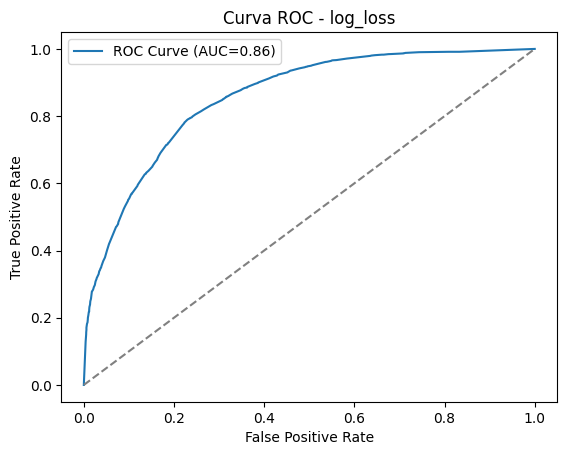

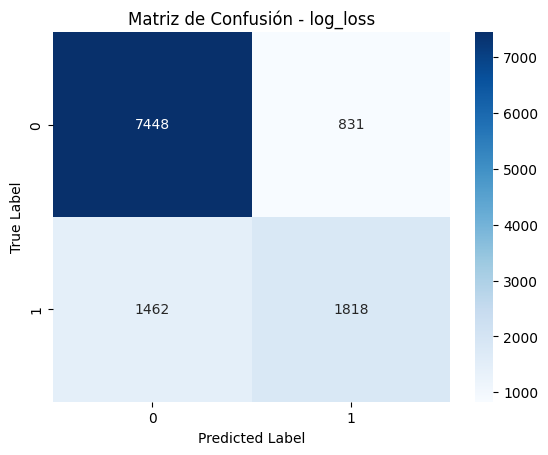

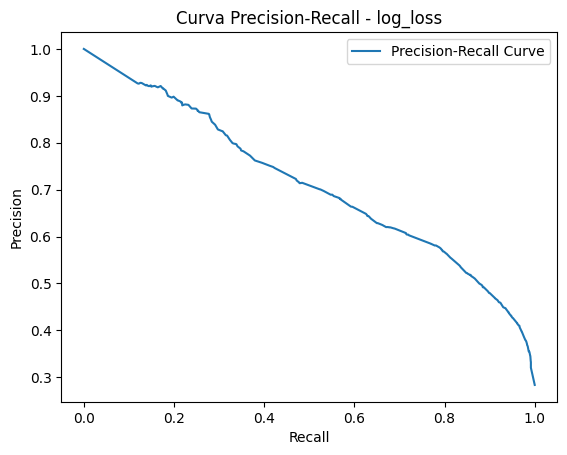


--------------------------------------------------
Modelo Optimizado 66
--------------------------------------------------
Criterion: log_loss, Splitter: random, Max Depth: 10, Min Samples Split: 2, Min Samples Leaf: 2

Classification Report for log_loss - random:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      8279
           1       0.69      0.55      0.61      3280

    accuracy                           0.80     11559
   macro avg       0.76      0.73      0.74     11559
weighted avg       0.79      0.80      0.79     11559


ROC-AUC Score: 0.8564627223153498



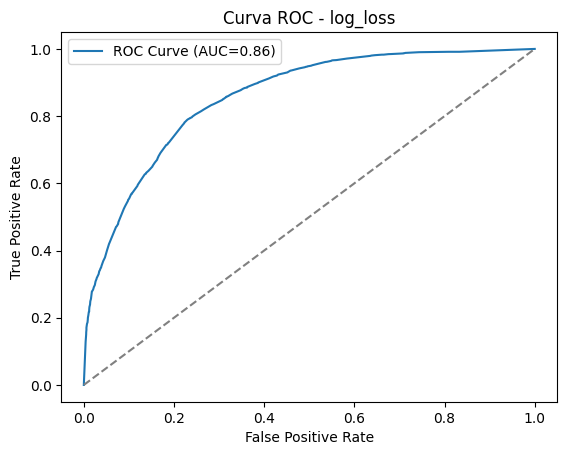

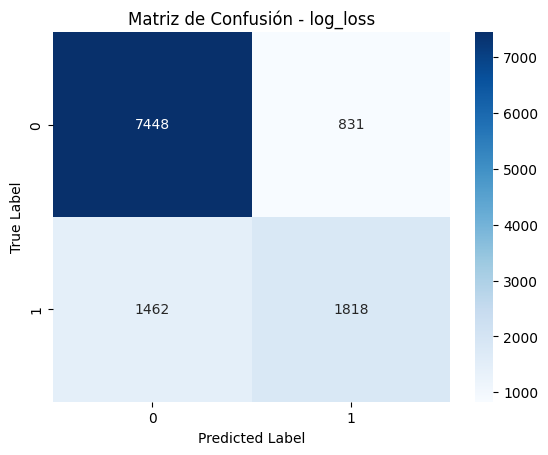

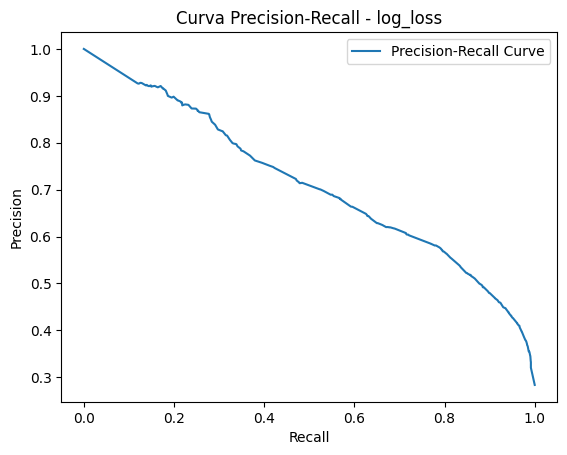


--------------------------------------------------
Modelo Optimizado 67
--------------------------------------------------
Criterion: log_loss, Splitter: random, Max Depth: 10, Min Samples Split: 2, Min Samples Leaf: 2

Classification Report for log_loss - random:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      8279
           1       0.69      0.55      0.61      3280

    accuracy                           0.80     11559
   macro avg       0.76      0.73      0.74     11559
weighted avg       0.79      0.80      0.79     11559


ROC-AUC Score: 0.8564627223153498



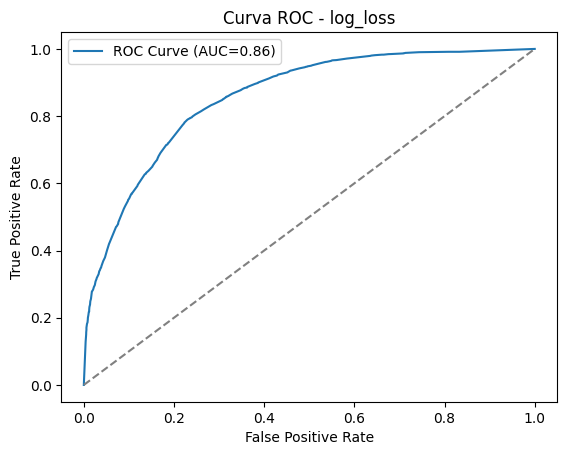

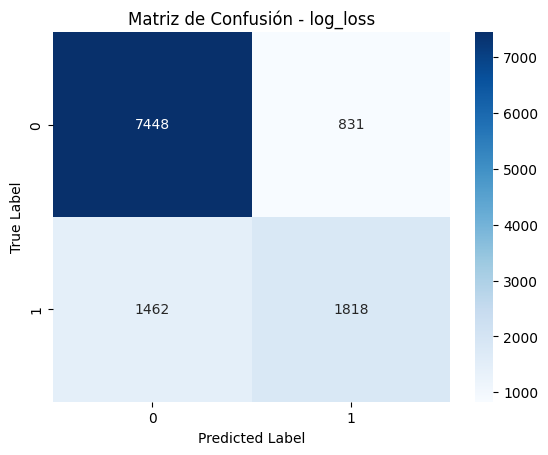

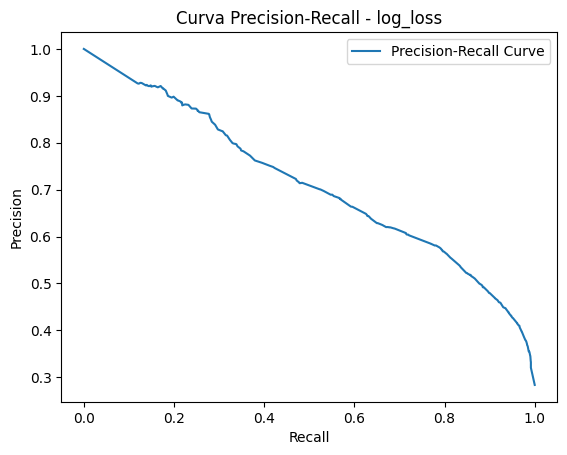

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
64,log_loss,random,10,2,2,0.805173,0.797356,0.805173,0.861453,0.796457,0.812635,OK
65,log_loss,random,10,2,2,0.805173,0.797356,0.805173,0.861453,0.796457,0.812635,OK
66,log_loss,random,10,2,2,0.805173,0.797356,0.805173,0.861453,0.796457,0.812635,OK


In [21]:
# Definir hiperparámetros a iterar
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [ 3,  10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt'], # Número de características consideradas en cada división
    'bootstrap': [True, False],  # Si se usa muestreo con reemplazo
    'class_weight': [None],  # Ponderación de clases
    'min_weight_fraction_leaf': [0.0, 0.01],  # Fracción mínima del peso de muestras en una hoja
    'max_leaf_nodes': [None, 50],  # Número máximo de nodos hoja en el árbol
    'warm_start': [False, True]

}


# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf,max_features,bootstrap,class_weight, min_weight_fraction_leaf,max_leaf_nodes, warm_start = params


    # Construir el modelo con los hiperparámetros actuales
    model = DecisionTreeClassifier(
        criterion=criterion, 
        splitter=splitter, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
     overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
     overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
     overfitting_warning = "MILD OVERFITTING"
    else:
     overfitting_warning = "OK"

    
    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'splitter': splitter,
        'max_depth': int(max_depth) if pd.notna(max_depth) else None,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Imprimir resultados parciales
    print(f"Criterion: {criterion}, Splitter: {splitter}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'Criterion: {row["criterion"]}, Splitter: {row["splitter"]}, Max Depth: {row["max_depth"]}, Min Samples Split: {row["min_samples_split"]}, Min Samples Leaf: {row["min_samples_leaf"]}')
    print(f'\nClassification Report for {row["criterion"]} - {row["splitter"]}:')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()
        
        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Curva Precision-Recall - {row["criterion"]}')
        plt.legend()
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models)

In [36]:
param_grids = {
    "AdaBoost": {
        'n_estimators': [50,250, 500],
        'learning_rate': [0.05, 0.1, 0.2],
        'algorithm': ['SAMME.R'],
        'random_state': [42]
    },
    "GradientBoosting": {
        'loss': ['log_loss'],
        'learning_rate': [0.05, 0.1, 0.2],
        'n_estimators': [50, 250, 500],
        'subsample': [1.0],
        'criterion': ['friedman_mse'],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'max_depth': [3],
        'random_state': [42],
        'max_features': ['sqrt']
    },
    "XGBoost": {
        'learning_rate': [0.05, 0.1, 0.2],
        'n_estimators': [50, 250, 500],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [1.0],
        'colsample_bytree': [0.8],
        'reg_alpha': [0],
        'reg_lambda': [1],
        'gamma': [0],
        'scale_pos_weight': [1],
        'base_score': [0.5],
        'random_state': [42],
        'verbosity': [1]
    }
}

# Modelos a probar
models = {
    "AdaBoost": AdaBoostClassifier,
    "GradientBoosting": GradientBoostingClassifier,
    "XGBoost": XGBClassifier
}

# Almacenar resultados
results = []

# Iterar sobre modelos y combinaciones de hiperparámetros
for model_name, model_class in models.items():
    param_grid = param_grids[model_name]
    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        
        # Instanciar y entrenar el modelo
        model = model_class(**param_dict)
        model.fit(X_train, y_train)
        
        # Predecir
        y_pred = model.predict(X_test)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        
        # Calcular ROC-AUC si hay más de una clase
        if len(np.unique(y_test)) > 1 and hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        else:
            roc_auc = None
        
        # Validación cruzada
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        mean_cv_score = np.mean(cv_scores)
        
        # Calcular Train Score
        train_score = model.score(X_train, y_train)
        
        # Determinar si hay sobreajuste
        if train_score > 1.5 * mean_cv_score:
            overfitting_warning = "SEVERE OVERFITTING"
        elif train_score > 1.2 * mean_cv_score:
            overfitting_warning = "DANGER"
        elif train_score > 1.1 * mean_cv_score:
            overfitting_warning = "MILD OVERFITTING"
        else:
            overfitting_warning = "OK"
        
        # Guardar resultados
        param_dict.update({
            'model': model_name,
            'accuracy': accuracy,
            'f1_score': f1,
            'recall': recall,
            'roc_auc': roc_auc,
            'cv_score': mean_cv_score,
            'train_score': train_score,
            'overfitting': overfitting_warning
        })
        results.append(param_dict)

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar los mejores modelos sin sobreajuste
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Mostrar los mejores modelos
from IPython.display import display
display(best_models)




C:\Users\lucia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lucia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lucia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

,n_estimators,learning_rate,algorithm,random_state,model,accuracy,f1_score,recall,roc_auc,cv_score,...,max_depth,max_features,min_child_weight,colsample_bytree,reg_alpha,reg_lambda,gamma,scale_pos_weight,base_score,verbosity
26,500,0.2,NaN,42,XGBoost,0.835193,0.830699,0.835193,0.901006,0.830262,...,3.0,NaN,1.0,0.8,0.0,1.0,0.0,1.0,0.5,1.0
17,500,0.2,NaN,42,GradientBoosting,0.832252,0.826966,0.832252,0.895274,0.827861,...,3.0,sqrt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,500,0.1,NaN,42,XGBoost,0.831733,0.826173,0.831733,0.896924,0.826953,...,3.0,NaN,1.0,0.8,0.0,1.0,0.0,1.0,0.5,1.0
